# Experimental Results on the COVID19 data

## Import of the libraries and our package

In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from covid import * #allows us to use our functions directly

## Test of the PD3S algorrithm to compute the MAP 

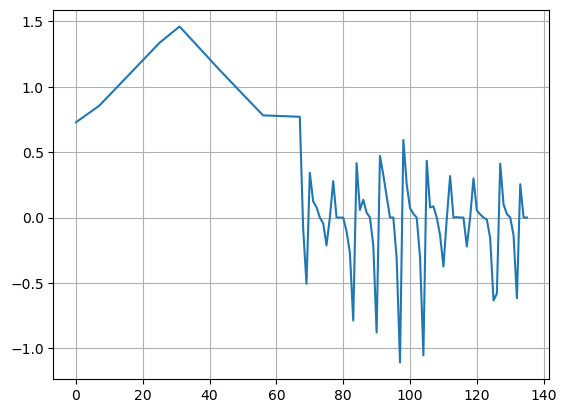

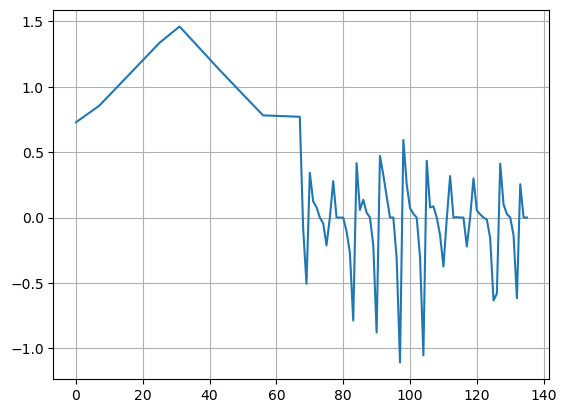

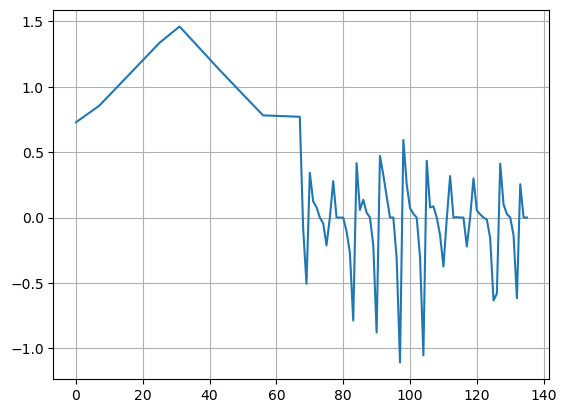

In [5]:
plt.figure()
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
MAP= PD3S(Z,phi)
plt.plot(MAP)
plt.grid()
plt.show()

## Test of the Randow walk method on the data

C:\PAUL\Cours\4A\PIR\mcmc-epidemic\covid.py:21: RuntimeWarning: invalid value encountered in log
  log_pi_val = -np.sum(R*phi + c*O - Z*np.log(R*phi + c*O + 1e-10)) - lambda_R*np.linalg.norm(D@R + shR, ord = 1) - lambda_O*np.linalg.norm(C@O+shO, ord = 1)


50000


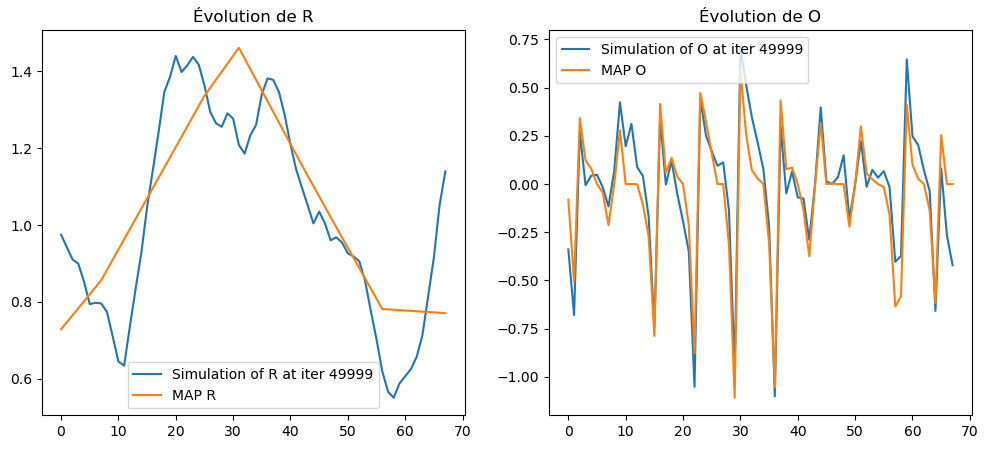

100000


<Figure size 640x480 with 0 Axes>

150000


<Figure size 640x480 with 0 Axes>

200000


<Figure size 640x480 with 0 Axes>

250000


<Figure size 640x480 with 0 Axes>

300000


<Figure size 640x480 with 0 Axes>

350000


<Figure size 640x480 with 0 Axes>

400000


<Figure size 640x480 with 0 Axes>

450000


<Figure size 640x480 with 0 Axes>

500000


<Figure size 640x480 with 0 Axes>

End of the burn-in
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000
1450000
1500000
1550000
1600000
1650000
1700000
1750000
1800000
1850000
1900000
1950000
2000000


In [6]:
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
theta_tab,theta_tilde_tab, accepts, gammas,end_burn_in=MHRW(T,Z,phi,lambda_R,lambda_O,MAP,niter=2e6,method="image")

In [7]:
#Saving simulation results
np.savez("resultats2MIL.npz", theta_tab=theta_tab, accepts=accepts, gammas=gammas)

In [8]:
#loading results
data = np.load("resultats2MIL.npz")
theta_tab = data["theta_tab"]
accepts=data["accepts"]
gammas=data["gammas"]

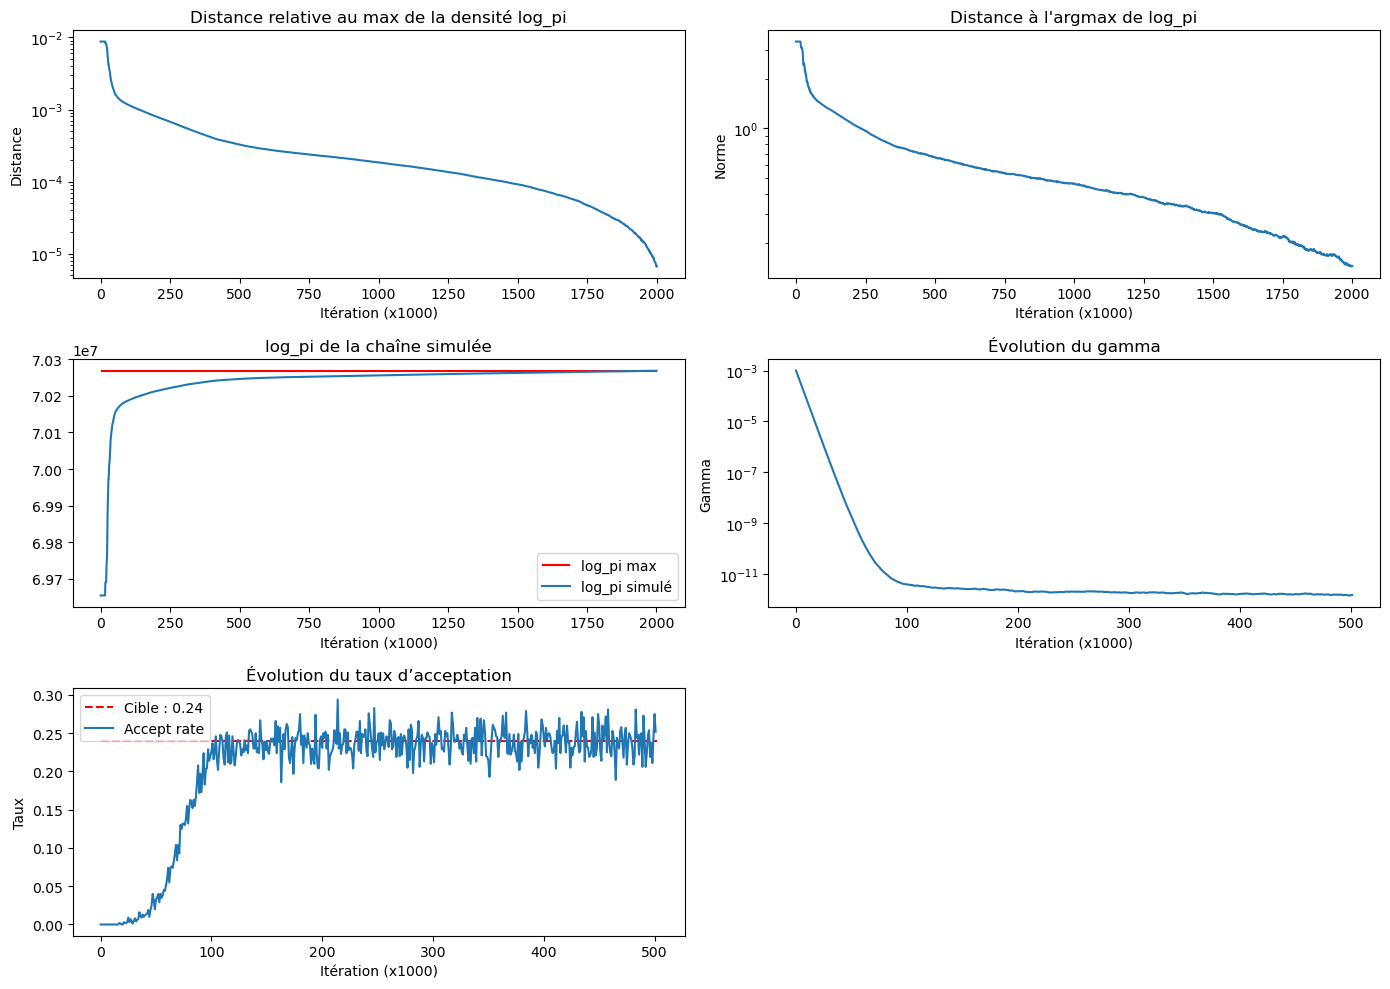

In [23]:
lambda_O = 0.05
lambda_R = 3.5*np.std(Z)
T=len(Z)
a = 0.73597
b = 0.73227
barsh=Buildbarsh(T,a,b)
D=BuildD(T)
C = np.diag(phi)

logpi_max=log_pi(MAP, phi,Z, lambda_R, D, barsh, lambda_O,phi,C)
log_pi_tab = np.apply_along_axis(lambda theta: log_pi(theta, phi, Z, lambda_R, D, barsh, lambda_O, phi, C),axis=1,arr=theta_tab[::1000])

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  # plus simple pour indexer

# 1. Distance au max de la densité log_pi
axes[0].semilogy(np.abs(log_pi_tab - logpi_max)/logpi_max)
axes[0].set_title("Distance relative au max de la densité log_pi")
axes[0].set_xlabel("Itération (x1000)")
axes[0].set_ylabel("Distance")

# 2. Distance à l'argmax de la densité log_pi
axes[1].semilogy(np.linalg.norm(theta_tab[::1000] - MAP, axis=1))
axes[1].set_title("Distance à l'argmax de log_pi")
axes[1].set_xlabel("Itération (x1000)")
axes[1].set_ylabel("Norme")

# 3. Log_pi de la chaîne simulée
axes[2].hlines(logpi_max, xmin=0, xmax=len(log_pi_tab), color='red', label="log_pi max")
axes[2].plot(log_pi_tab, label="log_pi simulé")
axes[2].set_title("log_pi de la chaîne simulée")
axes[2].legend()
axes[2].set_xlabel("Itération (x1000)")

# 4. Évolution de gamma
axes[3].semilogy(gammas)
axes[3].set_title("Évolution du gamma")
axes[3].set_xlabel("Itération (x1000)")
axes[3].set_ylabel("Gamma")

# 5. Évolution du taux d’acceptation
axes[4].hlines(0.24, xmin=0, xmax=len(accepts), linestyle='--', color='red', label="Cible : 0.24")
axes[4].plot(accepts, label="Accept rate")
axes[4].set_title("Évolution du taux d’acceptation")
axes[4].set_xlabel("Itération (x1000)")
axes[4].set_ylabel("Taux")
axes[4].legend()

# Supprimer le dernier subplot vide (le 6e)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


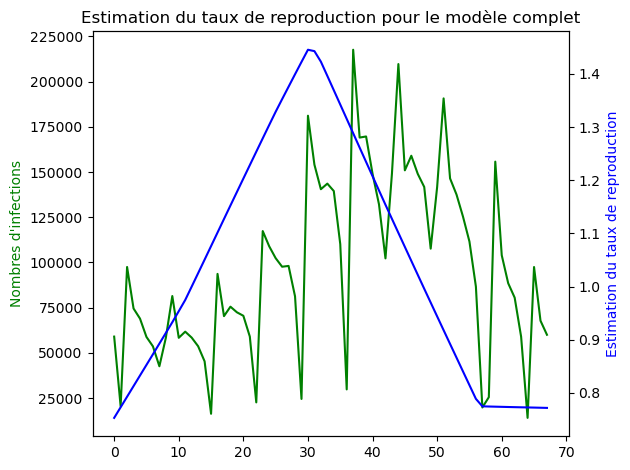

In [15]:
R_hat,O_hat=np.split(theta_tab[-1,:],2)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # deuxième axe y indépendant mais même axe x

ax1.plot(Z, 'g-')
ax2.plot(R_hat, 'b-')

ax1.set_ylabel('Nombres d\'infections', color='g')
ax2.set_ylabel('Estimation du taux de reproduction', color='b')
plt.title("Estimation du taux de reproduction pour le modèle complet")

fig.tight_layout()
plt.show()

## Modèle sans pénalité et sans correction $O$

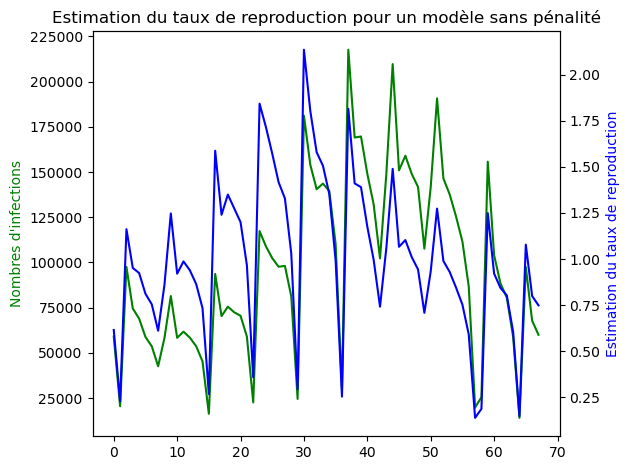

In [14]:
Z,phi=load_data('stuff/Z.csv', 'stuff/Phi.csv')
lambda_O = 0
lambda_R = 0
T=len(Z)
R_hat=Z/phi

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # deuxième axe y indépendant mais même axe x

ax1.plot(Z, 'g-')
ax2.plot(R_hat, 'b-')

ax1.set_ylabel('Nombres d\'infections', color='g')
ax2.set_ylabel('Estimation du taux de reproduction', color='b')
plt.title("Estimation du taux de reproduction pour un modèle sans pénalité")

fig.tight_layout()
plt.show()